In [1]:
%matplotlib notebook

from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Read the data

In [2]:
# Read the data
df = pd.read_csv('C:/Users/vabalagon/Desktop/Machine Learning Projects/Applied-Machine-Learning-Projects/Customer Churn Prediction/data/processed.csv')

# Get the features and target variable from the dataframe
X = df.drop(['state', 'area_code', 'churn'], axis=1).to_numpy()
y = df['churn'].to_numpy()

# Split into training and testing parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y, 
                                                    test_size = 0.25, 
                                                    shuffle=True, 
                                                    random_state=42, 
                                                    stratify=y) #, stratify=y_smote
# Apply SMOTE oversampling technique to the training set
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_smote))

Resampled dataset shape Counter({0: 2739, 1: 2739})


# Decision Tree Model (CART) with no SMOTE

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

In [4]:
def accuracy_per_class(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)

    for y_i in np.unique(y_test)[::-1]:
        print()

        # Find the indices of y_i in the true labels
        indices_i = np.where(y_test == y_i)

        # Computes the accuracy
        print('class', y_i, 'Accuracy: ', str(round(np.sum(y_test[indices_i] == y_pred[indices_i])/ len(np.where(y_test==y_i)[0]), 3)))

# Model

In [7]:
decision_tree_clf = DecisionTreeClassifier(criterion='entropy', 
                                               max_depth=5, 
                                               splitter="best", 
                                               random_state=42,
                                               min_samples_leaf=1, 
                                               class_weight='balanced') #, class_weight='balanced'
decision_tree_clf.fit(X_train, y_train)

print('Accuracy')
print("Training set accuracy score:", accuracy_score(y_train, decision_tree_clf.predict(X_train))) 
print("Test set accuracy score:", accuracy_score(y_test, decision_tree_clf.predict(X_test)))
print('\nBalanced Accuracy')
print("Training set balanced accuracy score:", balanced_accuracy_score(y_train, decision_tree_clf.predict(X_train))) 
print("Test set balanced accuracy score:", balanced_accuracy_score(y_test, decision_tree_clf.predict(X_test)))

Accuracy
Training set accuracy score: 0.9777219956071541
Test set accuracy score: 0.9717779868297272

Balanced Accuracy
Training set balanced accuracy score: 0.9319612052104522
Test set balanced accuracy score: 0.9167141292442498


##### Accuracy of the classifier on the individual classes

In [8]:
accuracy_per_class(decision_tree_clf, X_test, y_test)


class 1 Accuracy:  0.84

class 0 Accuracy:  0.993


### Show the tree

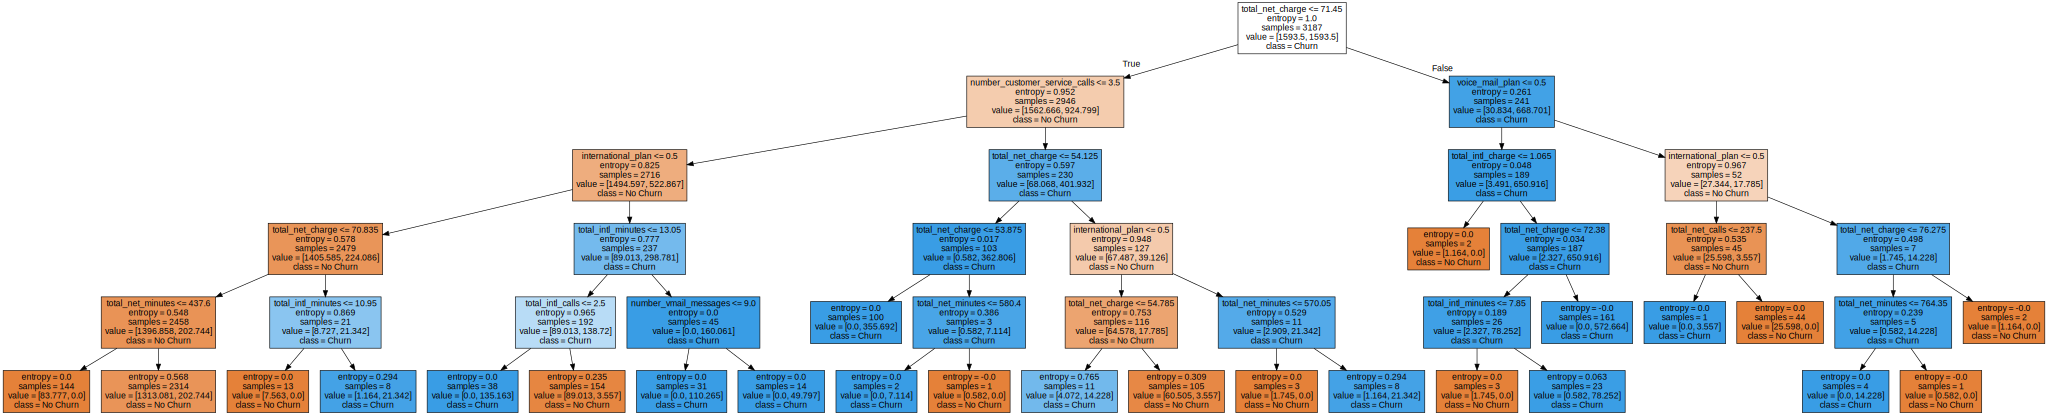

In [9]:
import graphviz
from sklearn import tree

_ = tree.export_graphviz(decision_tree_clf,
                           feature_names=df.drop(['state', 'area_code', 'churn'], axis=1).columns,  
                           class_names= ["No Churn", "Churn"], 
                           filled=True,
                           out_file=None)

dec_tree = graphviz.Source(_, format="png") 
dec_tree

### Feature importance

In [10]:
decision_tree_clf.feature_importances_

array([0.00000000e+00, 2.08179617e-01, 4.76405581e-02, 4.55203608e-16,
       4.94164607e-02, 8.79286458e-02, 4.04001756e-03, 1.87444029e-01,
       1.31384461e-02, 6.92485447e-03, 3.95287372e-01])

In [11]:
# Get the importances of each column 
importances = decision_tree_clf.feature_importances_

# Arranges the indices such that the importances are arranged in descending order
indices = np.argsort(importances)[::-1]

# Find the corresponding columns
cols_feature_importance = df.drop(['state', 'area_code', 'churn'], axis=1).columns[indices].to_numpy()
print(cols_feature_importance)

['total_net_charge' 'international_plan' 'number_customer_service_calls'
 'total_intl_calls' 'total_intl_minutes' 'voice_mail_plan'
 'total_net_minutes' 'total_net_calls' 'total_intl_charge'
 'number_vmail_messages' 'account_length']


<IPython.core.display.Javascript object>


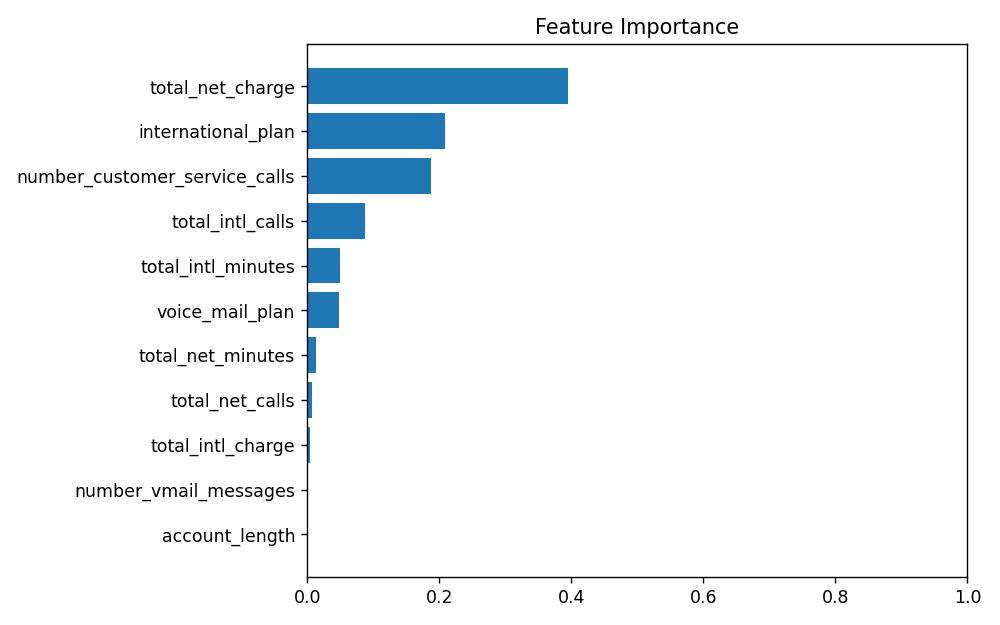

In [12]:
plt.figure(figsize=(8,5))

plt.barh(cols_feature_importance[::-1], importances[indices][::-1])
plt.title('Feature Importance')
plt.xlim(0,1)

plt.tight_layout()

# Decision tree with SMOTE oversampling

In [13]:
decision_tree_clf_SMOTE = DecisionTreeClassifier(criterion='entropy', 
                                               max_depth=12, 
                                               splitter="best", 
                                               random_state=42,
                                               min_samples_leaf=1, 
                                               class_weight='balanced') #, class_weight='balanced'
decision_tree_clf_SMOTE.fit(X_train_smote, y_train_smote)

print('Accuracy')
print("Training set accuracy score:", accuracy_score(y_train, decision_tree_clf_SMOTE.predict(X_train))) 
print("Test set accuracy score:", accuracy_score(y_test, decision_tree_clf_SMOTE.predict(X_test)))
print('\nBalanced Accuracy')
print("Training set balanced accuracy score:", balanced_accuracy_score(y_train, decision_tree_clf_SMOTE.predict(X_train))) 
print("Test set balanced accuracy score:", balanced_accuracy_score(y_test, decision_tree_clf_SMOTE.predict(X_test)))

Accuracy
Training set accuracy score: 0.9880765610291811
Test set accuracy score: 0.9614299153339605

Balanced Accuracy
Training set balanced accuracy score: 0.9585228087675377
Test set balanced accuracy score: 0.9051186564439577


##### Accuracy per class

In [14]:
accuracy_per_class(decision_tree_clf_SMOTE, X_test, y_test)


class 1 Accuracy:  0.827

class 0 Accuracy:  0.984
